<img style = "float: left; margin: 30px 15px 15px 15px;" src = "https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width = "300" height = "500" /> 
    
    
### <font color = "navy"> Simulación de procesos financieros. <font> 

**Nombres:** Moises Flores Ortíz y Miriam Eunice Rosas Medellín.

**Fecha:** 7 de mayo del 2021.

**Expediente**: 722183 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase 24
**Link al repositorio en Github**: https://github.com/Miriam1999/Tarea11_MFlores_MERosas

## Ejercicio 1
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- Down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación europea como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método, ya sea `down-and-out` o `Up-and-out`, defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada. Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

### Solución de Moises

### Solución de Miriam

#### <font color = "blue"> Importación de librerías, definición de funciones, cálculo de rendimientos y visualización de precios de cierre <font>

In [1]:
# Importar los paquetes que se van a usar
import numpy as np
import pandas as pd
import scipy.stats as st
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_datareader.data as web
%matplotlib inline

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date = None, end_date = None):
    # Fecha inicio por defecto (start_date = "2010-01-01") y fecha fin por defecto (end_date = today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name = tickers, data_source = "yahoo", start = start_date, end = end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes["Adj Close"]
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace = True)
    return closes

# Función que calcula el rendimiento logarítmico diario
def calc_daily_ret(closes):
    return np.log(closes / closes.shift(1)).dropna()

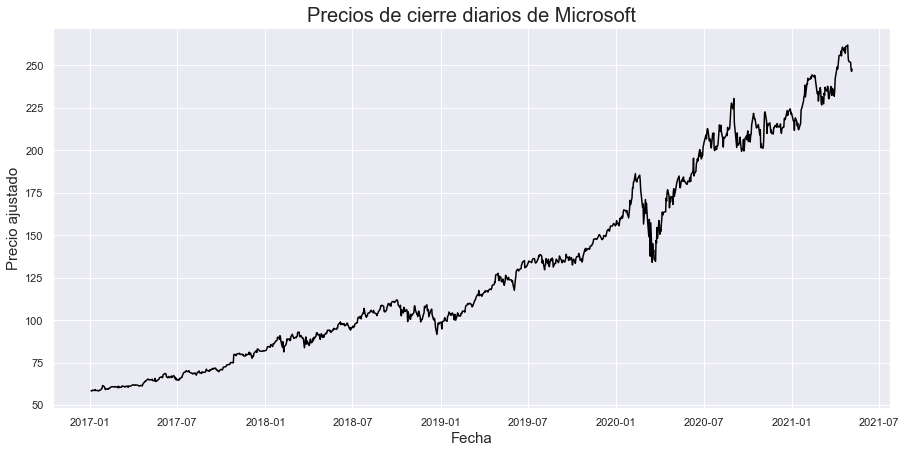

In [2]:
closes = get_adj_closes(["MSFT"], "2017-01-01") # inicia el primer día del año 2017
closes_msft = closes.loc[:, "MSFT"] # precios de cierre diarios
ret_msft = calc_daily_ret(closes_msft) # calcular los rendimientos logarítmicos diarios
plt.figure(figsize = [15, 7]) # gráfica de los precios de cierre
plt.plot(closes_msft, color = "black")
plt.title("Precios de cierre diarios de Microsoft", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Precio ajustado", fontsize = 15)
plt.show()

Para un activo con precio $S_t$, la función de pagos de una opción barrera está definida de la siguiente forma
\begin{equation} V_T = u(t)F_T \end{equation}
para $0\leq t\leq T$.

- Recordar que las sonrisas de volatilidad se ven de la siguiente forma
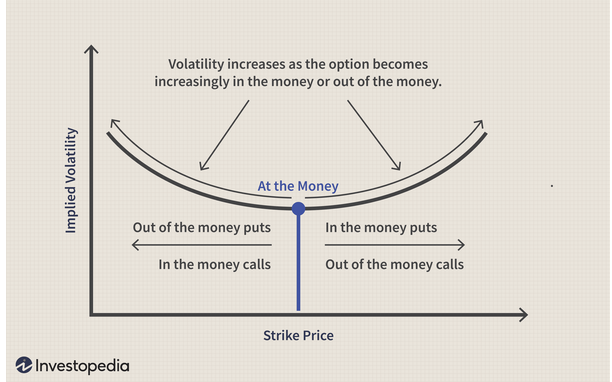

#### <font color = "red"> Valuación de opción Call <font>

En este caso, $F_T=\max(S_T - K, 0)$ para una opción tipo call. La función $u(t)$ está definida en $0\leq t\leq T$, toma el valor del primer argumento sí se cumple cierta condición y el valor de cero en otro caso. Se dice que $S_t$ ha caído por debajo de la barrera $B$ sí $S_0 > B$ y $S_t < B$ para algún tiempo $t$ en el periodo considerado.Finalmente, para un enunciado $x$, se define la función indicadora $I(x)$ como $I(x) = 1$ si $x$ se cumple e $I(x) = 0$ en otro caso.

De esta forma, la función knock-out de esta call es la siguiente
* Down-and-out call: Si $S_0 > B$, $C_t^{do} = \max\{S_T - K,0\}I(S_t > B)$
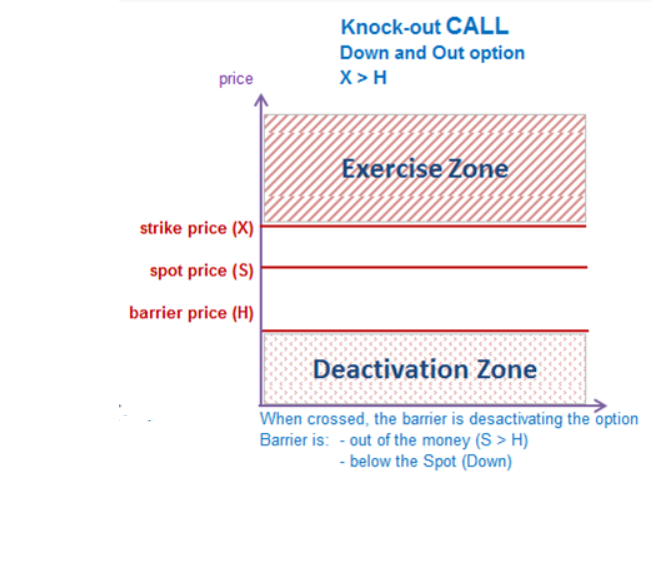

A continuación analizaré todas las call disponibles. Me gustaría que la fecha de cierre de contrato `Expiry` fuera aproximadamente en un año.

In [3]:
msft = web.YahooOptions("MSFT")
msft_opt = msft.get_all_data().reset_index()
msft_opt[msft_opt["Type"] == "call"].set_index("Expiry").sort_index()[:][650:660] # quiero ver sólo algunos calls

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2022-03-18,85.0,call,MSFT220318C00085000,147.55,175.80,176.70,0.000000,0.000000,1.0,8.0,1.205143,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-03-25 15:56:45,"{'contractSymbol': 'MSFT220318C00085000', 'str..."
2022-03-18,360.0,call,MSFT220318C00360000,1.44,1.55,1.72,0.000000,0.000000,1.0,191.0,0.253914,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-05 13:30:05,"{'contractSymbol': 'MSFT220318C00360000', 'str..."
2022-03-18,250.0,call,MSFT220318C00250000,21.72,21.15,21.80,-0.530001,-2.382026,14.0,3633.0,0.247841,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 17:19:05,"{'contractSymbol': 'MSFT220318C00250000', 'str..."
2022-03-18,160.0,call,MSFT220318C00160000,93.50,88.40,89.15,0.000000,0.000000,1.0,201.0,0.298164,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-30 17:14:48,"{'contractSymbol': 'MSFT220318C00160000', 'str..."
2022-03-18,190.0,call,MSFT220318C00190000,66.14,61.55,62.35,0.000000,0.000000,2.0,192.0,0.280403,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 17:36:37,"{'contractSymbol': 'MSFT220318C00190000', 'str..."
2022-03-18,165.0,call,MSFT220318C00165000,88.19,83.70,84.55,0.000000,0.000000,1.0,103.0,0.297370,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-30 15:25:52,"{'contractSymbol': 'MSFT220318C00165000', 'str..."
2022-03-18,195.0,call,MSFT220318C00195000,57.70,57.35,58.00,0.000000,0.000000,5.0,135.0,0.273597,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-04 18:26:18,"{'contractSymbol': 'MSFT220318C00195000', 'str..."
2022-03-18,265.0,call,MSFT220318C00265000,15.61,15.15,15.60,0.420000,2.764978,8.0,479.0,0.243919,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 14:23:15,"{'contractSymbol': 'MSFT220318C00265000', 'str..."
2022-03-18,365.0,call,MSFT220318C00365000,1.35,1.39,1.52,-0.120000,-8.163265,1.0,1085.0,0.254280,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 14:48:10,"{'contractSymbol': 'MSFT220318C00365000', 'str..."


In [4]:
opt_candidatas = msft_opt.loc[(msft_opt.Type == "call") & (msft_opt.Expiry == "2022-03-18")].set_index("Expiry")
opt_candidatas # quiero que más o menos el plazo sea de 1 año

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2022-03-18,80.0,call,MSFT220318C00080000,152.90,180.70,181.60,0.00,0.000000,5.0,18.0,1.263248,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-03-25 15:27:14,"{'contractSymbol': 'MSFT220318C00080000', 'str..."
2022-03-18,85.0,call,MSFT220318C00085000,147.55,175.80,176.70,0.00,0.000000,1.0,8.0,1.205143,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-03-25 15:56:45,"{'contractSymbol': 'MSFT220318C00085000', 'str..."
2022-03-18,90.0,call,MSFT220318C00090000,153.17,139.60,141.10,0.00,0.000000,77.0,0.0,0.000010,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-02-17 17:59:46,"{'contractSymbol': 'MSFT220318C00090000', 'str..."
2022-03-18,95.0,call,MSFT220318C00095000,162.55,151.55,152.45,0.00,0.000000,1.0,12.0,0.000010,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-20 13:30:00,"{'contractSymbol': 'MSFT220318C00095000', 'str..."
2022-03-18,100.0,call,MSFT220318C00100000,148.62,147.90,148.85,0.00,0.000000,1.0,28.0,0.536992,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-05 15:15:11,"{'contractSymbol': 'MSFT220318C00100000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,365.0,call,MSFT220318C00365000,1.35,1.39,1.52,-0.12,-8.163265,1.0,1085.0,0.254280,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 14:48:10,"{'contractSymbol': 'MSFT220318C00365000', 'str..."
2022-03-18,370.0,call,MSFT220318C00370000,1.78,1.26,1.42,0.00,0.000000,2.0,16.0,0.257515,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-28 17:05:04,"{'contractSymbol': 'MSFT220318C00370000', 'str..."
2022-03-18,375.0,call,MSFT220318C00375000,1.90,1.16,1.30,0.00,0.000000,NaN,4.0,0.259529,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-20 15:15:56,"{'contractSymbol': 'MSFT220318C00375000', 'str..."


A continuación grafico la sonrisa de volatilidad del call con la fecha `Expiry` definida.

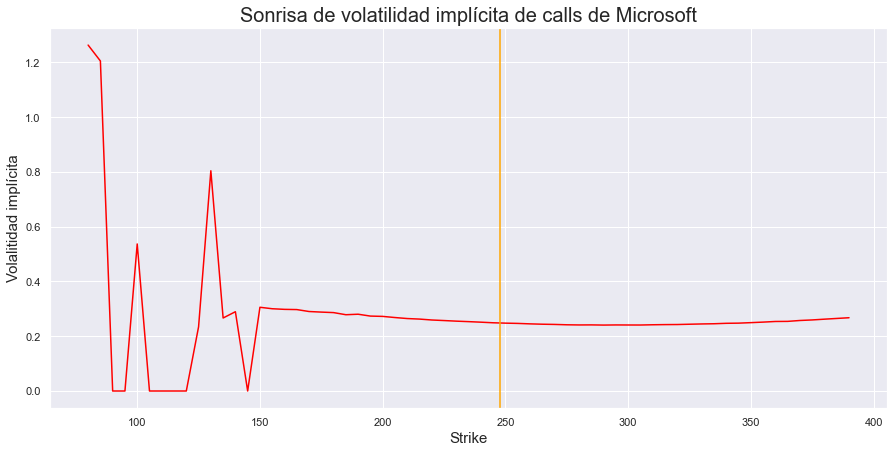

In [5]:
plt.figure(figsize = [15, 7]) # gráfica de sonrisa de volatilidad implícita
plt.plot(opt_candidatas.set_index("Strike").loc[:, "IV"], color = "red")
plt.title("Sonrisa de volatilidad implícita de calls de Microsoft", fontsize = 20)
plt.xlabel("Strike", fontsize = 15)
plt.ylabel("Volalitidad implícita", fontsize = 15)
plt.axvline(opt_candidatas.Underlying_Price.iloc[0], color = "orange")
plt.show()

In [6]:
print("El precio del activo subyacente (acciones de Microsoft) es " + str(opt_candidatas.Underlying_Price[0]) + ".") # recordar

El precio del activo subyacente (acciones de Microsoft) es 247.78.


A pesar de que la sonrisa no se aprecia del todo bien, sí se alcanza a notar que la volatilidad implícita es menor en el precio del activo subyacente (acciones de Microsoft); es decir, cuando está `At the Money`. Sin embargo, analizando los precios de cierre de las acciones de Microsoft, se ve claramente una **tendencia alcista**, y considerando que **el `precio strike` debe ser mayor al `spot price` para que la call down-and-out tenga sentido**, entonces decido definir mi `strike` en 265 (no tan lejos del `spot price` porque **no tengo un perfil de propensión al riesgo**). Además, la sonrisa demuestra que **a pesar de que el strike sea muy alto, la volatilidad implícita no cambiará tanto**. Esto vuelve a la opción de mi elección, una `opción de compra out of the money`.

Puede que la sonrisa de volatilidad no esté tan marcada debido a que el plazo de la opción que escogí no es corto (es de aproximadamente 10 meses), y se sabe que la sonrisa de volatilidad se marca más cuando la opción es a corto plazo.

In [7]:
opt_deseada = msft_opt.loc[(msft_opt.Type == "call") & (msft_opt.Strike == 265) & (msft_opt.Expiry == "2022-03-18")]
opt_deseada # defino mi strike de 375, debe ser más alto que el spot price

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1190,265.0,2022-03-18,call,MSFT220318C00265000,15.61,15.15,15.6,0.42,2.764978,8.0,479.0,0.243919,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 14:23:15,"{'contractSymbol': 'MSFT220318C00265000', 'str..."


##### <font color = "blue"> Simulación con modelo de rendimientos normales <font>

A continuación realizo la comparativa entre la call europea y la call barrera con el modelo de rendimientos normales. La tasa libre de riesgo necesaria para valuar la opción se tomó del bono del tesoro de E. U. A. a un año. Se simuló con 100,000 escenarios para tener una valuación un poco más precisa y se definió una **barrera de 210 debido a que se sabe que esta debe ser menor al `spot price`**. La defino **muy cercana al `spot price` porque no considero que sea probable que se toque dicha barrera debido a que el precio de las acciones de Microsoft tiene claramente una tendencia alcista**.

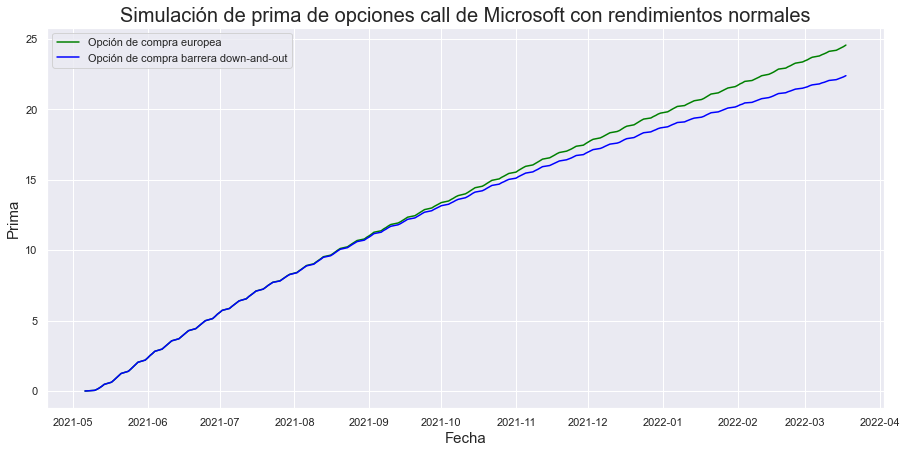

In [8]:
np.random.seed(5555) # semilla
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
mu = ret_msft.mean() # media de los rendimientos diarios de Microsoft
sigma = ret_msft.std() # desviación estándar de los rendimientos diarios de Microsodt
r = 0.0006 / 360 # la tasa libre de riesgo de obtiene de los bonos del tesoro de E.U.A. a un año
today = pd.Timestamp(date.today()) # datos de la opción del plazo y del día de actual
expiry = opt_valuar.Expiry # fecha de expiración
dates = pd.date_range(start = today, end = expiry, freq = "B") # fechas desde el día de hoy hasta el cierre del contrato
ndays = len(dates) # número de días a simular
nscen = 100000 # cantidad de escenarios a simular para el método de montecarlo
K = opt_valuar.Strike # precio strike
S0 = closes_msft.iloc[-1] # último precio de cierre
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays, nscen) + r, index = dates) # simulación de los rendimientos
sim_closes = S0 * np.exp(sim_ret.cumsum()) # simulación de precios
strike = K # precio strike es la K
call = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(sim_closes - strike, 0).mean(axis = 1)}, index = dates)
pd.set_option("display.max_columns", 15)
B = 210 # precio barrera cercano al spot price porque considero que los precios seguirán aumentando y es poco probable que toque
I = (sim_closes > B).cumprod(axis = 0) > 0 # función de desactivación knock-out
calldo_norm = pd.DataFrame({"Prima down-and-out": np.exp(-r * ndays) * (I * np.fmax(sim_closes - strike, 
                                                                                    0)).mean(axis = 1)}, index = dates) 
plt.figure(figsize = [15, 7]) # gráfica de simulación con rendimientos normales de call europea y down and out
plt.plot(call, color = "green", label = "Opción de compra europea")
plt.plot(calldo_norm, color = "blue", label = "Opción de compra barrera down-and-out")
plt.title("Simulación de prima de opciones call de Microsoft con rendimientos normales", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.legend(loc = "best")
plt.show()

In [9]:
print("El precio real de la prima del call de Microsot es " + str(opt_valuar["JSON"]["lastPrice"]) + ".") # recordar prima

El precio real de la prima del call de Microsot es 15.61.


**Valuación europea**

In [10]:
call.iloc[-1] # valuación de la prima de call europea en el último día

Prima europea    24.545415
Name: 2022-03-18 00:00:00, dtype: float64

In [11]:
confianza = 0.95 # nivel de confianza de 95%, se usará en todas las valuaciones
sigma_est = sim_closes.iloc[-1].sem() # desviación estándar de la simulación de call
mean_est = call.iloc[-1]["Prima europea"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo de los rendimientos normales" +
      " es " + str(i) + ".")

El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo de los rendimientos normales es (24.10394235326501, 24.98688844087766).


El intervalo de confianza de la valuación de la prima europea da ligeramente cerca a la prima real, por lo que la simulación con el modelo de rendimientos normales es confiable.

**Valuación barrera**

In [12]:
calldo_norm.iloc[-1] # valuación de la prima de call barrera en el último día

Prima down-and-out    22.374821
Name: 2022-03-18 00:00:00, dtype: float64

In [13]:
mean_est = calldo_norm.iloc[-1]["Prima down-and-out"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo de los rendimientos" +
      " normales es " + str(i) + ".")

El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo de los rendimientos normales es (21.9333484136367, 22.816294501249352).


El invervalo de confianza de la valuación de la prima barrera con el modelo de rendimientos normales se acerca aún más a la prima real que la europea. Tiene sentido que la prima del call down-and-out dé más baja debido a que el riesgo con ese tipo de opciones siempre es un poco mayor (o muy mayor, dependiendo de la barrera que se defina; **mientras más alta la barrera, más alta la probabilidad que la opción se desactive por lo que el riesgo sería mayor y por lo tanto la prima más barata**).

##### <font color = "blue"> Simulación con histograma de rendimientos <font>

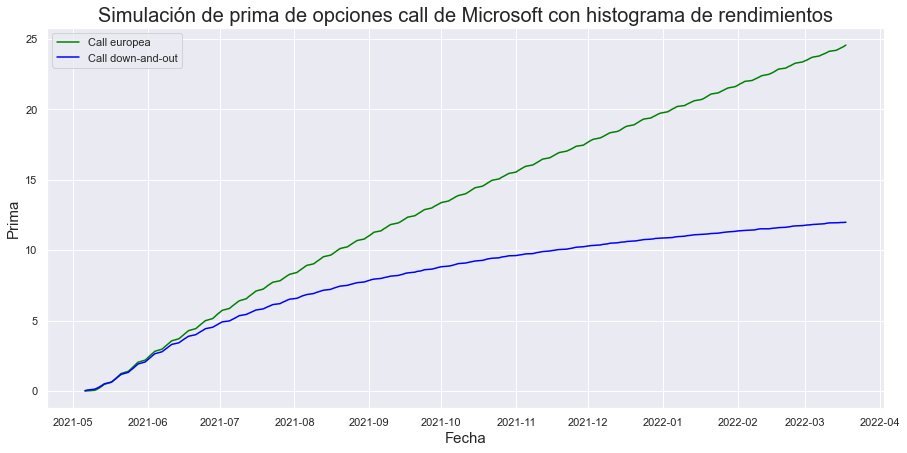

In [14]:
np.random.seed(5555) # semilla
freq, values = np.histogram(ret_msft - mu + r, bins = 10000) # centro mis datos en mi tasa libre de riesgo
prob = freq / np.sum(freq)
ret = np.random.choice(values[1:], (ndays, nscen), p = prob)
sim_ret_hist = pd.DataFrame(ret, index = dates) # simulación de los rendimientos diarios con el histograma
sim_closes_hist = S0 * np.exp(sim_ret_hist.cumsum()) # simulación de los precios de cierre con el histograma
strike = pd.DataFrame(K * np.ones([ndays, nscen]), index = dates) # para graficar el strike
call_hist = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(sim_closes_hist - strike, 
                                                                        np.zeros([ndays, nscen])).T.mean()}, index = dates)
calldo_hist = pd.DataFrame({"Prima down-and-out": np.exp(-r * ndays) * (I * np.fmax(sim_closes_hist - strike, 
                                                                                    0)).mean(axis = 1)}, index = dates) 
plt.figure(figsize = [15, 7]) # gráfica de simulación de prima del call europea y down and out
plt.plot(call, color = "green", label = "Call europea")
plt.plot(calldo_hist, color = "blue", label = "Call down-and-out")
plt.title("Simulación de prima de opciones call de Microsoft con histograma de rendimientos", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.legend(loc = "best")
plt.show()

In [15]:
print("El precio real de la prima del call de Microsot es " + str(opt_valuar["JSON"]["lastPrice"]) + ".") # recordar prima

El precio real de la prima del call de Microsot es 15.61.


**Valuación europea**

In [16]:
call_hist.iloc[-1] # valuación de la prima de call europea en el último día (al cierre del contrato)

Prima europea    24.598846
Name: 2022-03-18 00:00:00, dtype: float64

In [17]:
sigma_est = sim_closes_hist.iloc[-1].sem() # desviación estándar de la simulación con histograma
mean_est = call_hist.iloc[-1]["Prima europea"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo del histograma de los rendimientos es (24.159340659570567, 25.03835213820814).


El intervalo de confianza de la valuación de la prima europea da cerca a la prima real, por lo que la simulación con el histograma de los rendimientos también es confiable (un poco menos que la valuación con el modelo de rendimientos normales).

**Valuación barrera**

In [18]:
calldo_hist.iloc[-1] # valuación de la prima de call barrera en el último día (al cierre del contrato)

Prima down-and-out    11.975567
Name: 2022-03-18 00:00:00, dtype: float64

In [19]:
mean_est = calldo_hist.iloc[-1]["Prima down-and-out"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo del histograma de los rendimientos es (11.536061113711199, 12.415072592348771).


La valuación con el histograma de los rendimientos de la call barrera es menor a la valuación real de la opción, sin embargo es más cercana. La valuación de la opción europea da mejor con el modelo de rendimientos normales pero la valuació con la opción barrera da mejor con el modelo del histograma. Sin embargo, en conjunto que el error da menor con el modelo del histograma (porque 11 da más cercano a 15 que cualquiera de las otras valuaciones). Así, en general, considero que **el modelo de simulación que se aproxima mejor al valor de la prima es el de modelo del histograma de los rendimientos**. De cualquier forma, ambos métodos pueden funcionar.

#### <font color = "red"> Valuación de opción Put <font>

En este caso, $F_T=\max(K - S_T,0)$ para una opción tipo put. La función $u(t)$ está definida en $0\leq t\leq T$, toma el valor del primer argumento sí se cumple cierta condición y el valor de cero en otro caso. Se dice que $S_t$ ha superado la barrera $B$ si $S_0 < B$ y $S_t > B$ para algún tiempo $t$ en el periodo considerado. Finalmente, para un enunciado $x$, se define la función indicadora $I(x)$ como $I(x) = 1$ si $x$ se cumple e $I(x) = 0$ en otro caso.

De esta forma, la función knock-out de este put es la siguiente
* Up-and-out put: Si $S_0 < B$, $P_t^{uo} = \max\{K - S_T, 0\}I(S_t < B)$
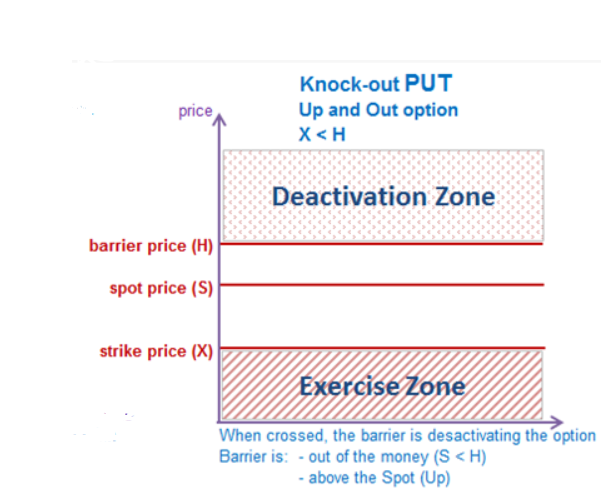

A continuación analizaré todos los put disponibles. Me gustaría que la fecha de cierre de contrato `Expiry` fuera aproximadamente en un año, igual que en el call analizado anteriormente.

In [20]:
msft_opt[msft_opt["Type"] == "put"].set_index("Expiry").sort_index()[:][620:630] # quiero ver sólo algunos puts

,Strike,Type,Symbol,Last,Bid,Ask,Chg,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,
2022-03-18,135.0,put,MSFT220318P00135000,2.32,1.50,1.64,0.00,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-03-22 17:15:52,"{'contractSymbol': 'MSFT220318P00135000', 'str..."
2022-03-18,190.0,put,MSFT220318P00190000,5.70,5.75,5.95,0.00,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-04 13:52:25,"{'contractSymbol': 'MSFT220318P00190000', 'str..."
2022-03-18,160.0,put,MSFT220318P00160000,2.70,2.57,2.71,0.24,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 14:42:50,"{'contractSymbol': 'MSFT220318P00160000', 'str..."
2022-03-18,305.0,put,MSFT220318P00305000,60.90,64.15,64.75,0.00,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 17:42:46,"{'contractSymbol': 'MSFT220318P00305000', 'str..."
2022-03-18,130.0,put,MSFT220318P00130000,1.34,1.23,1.34,0.04,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-30 14:01:40,"{'contractSymbol': 'MSFT220318P00130000', 'str..."
2022-03-18,90.0,put,MSFT220318P00090000,0.50,0.43,0.53,0.00,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 18:57:54,"{'contractSymbol': 'MSFT220318P00090000', 'str..."
2022-03-18,145.0,put,MSFT220318P00145000,1.80,1.78,1.89,0.00,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-29 19:50:06,"{'contractSymbol': 'MSFT220318P00145000', 'str..."
2022-03-18,215.0,put,MSFT220318P00215000,11.00,11.05,11.25,0.45,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 17:53:00,"{'contractSymbol': 'MSFT220318P00215000', 'str..."
2022-03-18,100.0,put,MSFT220318P00100000,0.66,0.58,0.68,-0.01,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 18:14:23,"{'contractSymbol': 'MSFT220318P00100000', 'str..."


In [21]:
opt_candidatas = msft_opt.loc[(msft_opt.Type == "put") & (msft_opt.Expiry == "2022-03-18")].set_index("Expiry")
opt_candidatas # quiero que más o menos el plazo sea de 1 año

,Strike,Type,Symbol,Last,Bid,Ask,Chg,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,
2022-03-18,80.0,put,MSFT220318P00080000,0.38,0.30,0.41,0.000000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-05 18:54:30,"{'contractSymbol': 'MSFT220318P00080000', 'str..."
2022-03-18,85.0,put,MSFT220318P00085000,0.44,0.36,0.47,0.000000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-04-28 18:44:26,"{'contractSymbol': 'MSFT220318P00085000', 'str..."
2022-03-18,90.0,put,MSFT220318P00090000,0.50,0.43,0.53,0.000000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 18:57:54,"{'contractSymbol': 'MSFT220318P00090000', 'str..."
2022-03-18,95.0,put,MSFT220318P00095000,0.61,0.50,0.60,0.000000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 19:18:49,"{'contractSymbol': 'MSFT220318P00095000', 'str..."
2022-03-18,100.0,put,MSFT220318P00100000,0.66,0.58,0.68,-0.010000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 18:14:23,"{'contractSymbol': 'MSFT220318P00100000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,360.0,put,MSFT220318P00360000,114.12,114.75,115.40,0.000000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-04 14:49:23,"{'contractSymbol': 'MSFT220318P00360000', 'str..."
2022-03-18,365.0,put,MSFT220318P00365000,120.61,120.40,121.20,-11.139999,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-06 13:46:09,"{'contractSymbol': 'MSFT220318P00365000', 'str..."
2022-03-18,370.0,put,MSFT220318P00370000,122.80,124.50,125.10,0.000000,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-05 16:03:14,"{'contractSymbol': 'MSFT220318P00370000', 'str..."


A continuación grafico la sonrisa de volatilidad del put con la fecha `Expiry` definida.

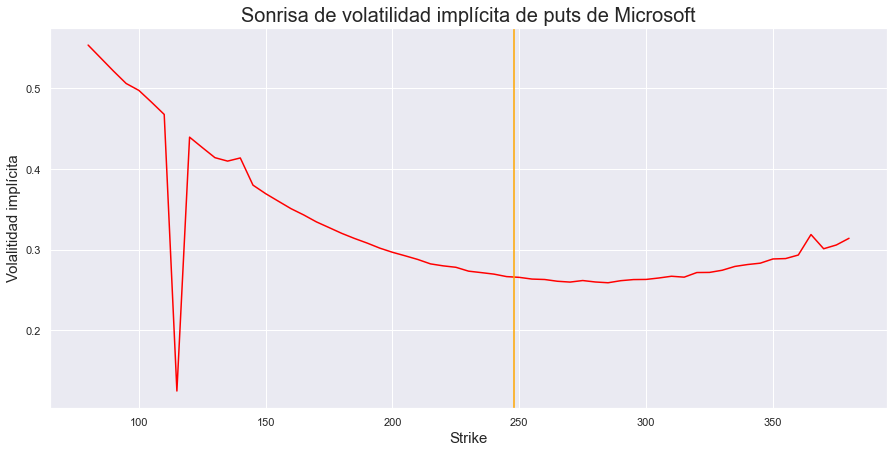

In [22]:
plt.figure(figsize = [15, 7]) # gráfica de sonrisa de volatilidad implícita
plt.plot(opt_candidatas.set_index("Strike").loc[:, "IV"], color = "red")
plt.title("Sonrisa de volatilidad implícita de puts de Microsoft", fontsize = 20)
plt.xlabel("Strike", fontsize = 15)
plt.ylabel("Volalitidad implícita", fontsize = 15)
plt.axvline(opt_candidatas.Underlying_Price.iloc[0], color = "orange")
plt.show()

In [23]:
print("El precio del activo subyacente (acciones de Microsoft) es " + str(opt_candidatas.Underlying_Price[0]) + ".") # recordar

El precio del activo subyacente (acciones de Microsoft) es 247.78.


En esta ocasión, la sonrisa de volatilidad se aprecia mejor porque sale menos plana que antes. Una vez más, la volatilidad implícita es más baja cuando el `strike` es igual al `precio spot`; es decir, cuando la opción está `At the Money`. Para escoger el `strike` de este put up-and-out es necesario tener en cuenta que **éste debe ser menor al `spot price`**. Me remito a la misma lógica que utilicé para escoger el `strike` en la call: considero que los precios de las acciones de Microsoft seguirán subiendo porque se ve claramente una **tendencia alcista** en ellos, y tomando en cuenta que **no soy tan propensa al riesgo**, decido tomar un `strike` cercano al `spot` (un strike de 215). La volatiliad implícita con este strike aumenta muy poco. Esto vuelve la opción de mi elección una `opción de venta our of the money`.

Una vez más, puntualizo que puede que la sonrisa de volatilidad no esté tan marcada en la gráfica debido a que el plazo de mi opción (de aproximadamente 10 meses) no es muy corto. Hay que recordar que mientras más corto el plazo, más se marca la sonrisa de volatilidad.

Es interesante notar que en esta ocasión, **la volatilidad implícita aumenta más fuertemente cuando se escogen puts `out of the money` que `in the money`**.

In [24]:
opt_deseada = msft_opt.loc[(msft_opt.Type == "put") & (msft_opt.Strike == 215) & (msft_opt.Expiry == "2022-03-18")]
opt_deseada # defino mi strike de 195, debe ser más bajo que el spot price

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
734,215.0,2022-03-18,put,MSFT220318P00215000,11.0,11.05,11.25,...,MSFT,False,MSFT,247.78,2021-05-06 19:19:04,2021-05-03 17:53:00,"{'contractSymbol': 'MSFT220318P00215000', 'str..."


##### <font color = "blue"> Simulación con modelo de rendimientos normales <font>

A continuación realizo la comparativa entre la put europea y la put barrera con el modelo de rendimientos normales. La tasa libre de riesgo y el número de escenarios es el mismo que en la simulación del call (de hecho se utiliza la misma simulación de rendimientos y precios de cierre que en el call ya que eso solo depende del activo subyacente, o sea las acciones de Microsoft) y se definió una **barrera de 300 debido a que se sabe que esta debe ser mayor al `spot price`. La defino un poco alejada del porque considero que es probable que se toque esa barrera tomando en cuenta que el spot price va a la alza**.

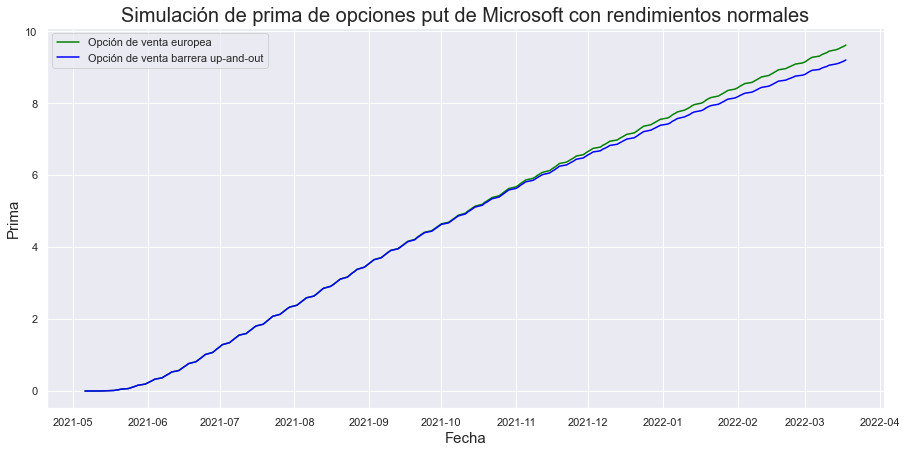

In [25]:
np.random.seed(5555) # semilla
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
K = opt_valuar.Strike # precio strike
strike = K # precio strike es la K
put = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(strike - sim_closes, 0).mean(axis = 1)}, index = dates)
B = 300 # precio barrera muy alto porque los precios seguirán aumentando y no quiero que lo alcance
I = (sim_closes < B).cumprod(axis = 0) > 0 # función de desactivación knock-out
putuo_norm = pd.DataFrame({"Prima up-and-out": np.exp(-r * ndays) * (I * np.fmax(strike - sim_closes, 
                                                                                 0)).mean(axis = 1)}, index = dates) 
plt.figure(figsize = [15, 7]) # gráfica de simulación con rendimientos normales de put europea y up and out
plt.plot(put, color = "green", label = "Opción de venta europea")
plt.plot(putuo_norm, color = "blue", label = "Opción de venta barrera up-and-out")
plt.title("Simulación de prima de opciones put de Microsoft con rendimientos normales", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.legend(loc = "best")
plt.show()

In [26]:
print("El precio real de la prima del put de Microsot es " + str(opt_valuar["JSON"]["lastPrice"]) + ".") # recordar prima

El precio real de la prima del put de Microsot es 11.0.


**Valuación europea**

In [27]:
put.iloc[-1] # valuación de la prima de put europea en el último día (al cierre del contrato)

Prima europea    9.611703
Name: 2022-03-18 00:00:00, dtype: float64

In [28]:
mean_est = put.iloc[-1]["Prima europea"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo de los rendimientos normales" +
      " es " + str(i) + ".")

El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo de los rendimientos normales es (9.172197194186767, 10.05120867282434).


El intervalo de confianza de la valuación de la prima europea da cerca a la prima real, por lo que la simulación con el modelo de rendimientos normales es confiable.

**Valuación barrera**

In [29]:
putuo_norm.iloc[-1] # valuación de la prima de put barrera en el último día (al cierre del contrato)

Prima up-and-out    9.198066
Name: 2022-03-18 00:00:00, dtype: float64

In [30]:
mean_est = putuo_norm.iloc[-1]["Prima up-and-out"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo de los rendimientos normales" +
      " es " + str(i) + ".")

El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo de los rendimientos normales es (8.758560087961687, 9.63757156659926).


En esta ocasión, sucedió lo contrario a la valuación de la call con el modelo de rendimientos normales. La valuación como opción europea se acercó más al precio real de la prima que la valuació como opción barrera. Una vez más, tiene sentido que la prima de la opción barrera resulte ligeramente más baja debido a que el riesgo de ese tipo de opciones siempre es un poco mayor (o muy mayor, dependiendo de la barrera que se defina; **mientras más baja la barrera, mayor es la probabilidad de que la opción se desactive por lo que el riesgo sería mayor y por lo tanto la prima más barata**).

##### <font color = "blue"> Simulación con histograma de rendimientos <font>

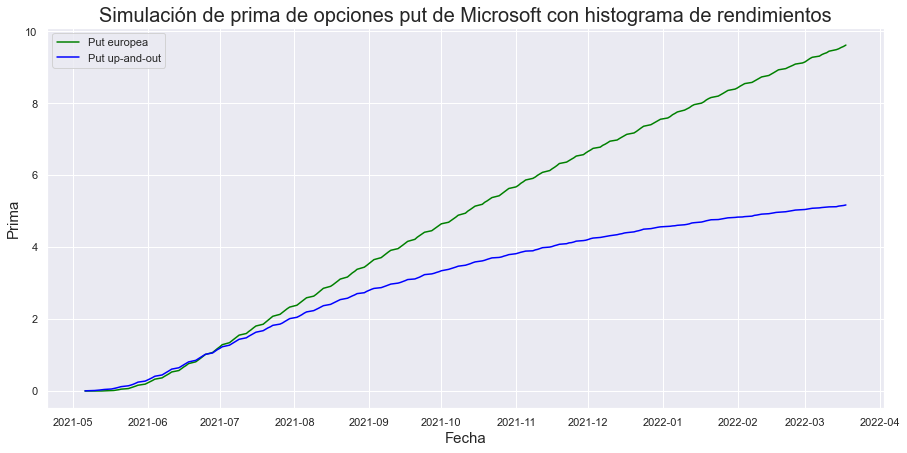

In [31]:
put_hist = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(strike - sim_closes_hist, 
                                                                       np.zeros([ndays, nscen])).T.mean()}, index = dates)
putuo_hist = pd.DataFrame({"Prima up-and-out": np.exp(-r * ndays) * (I * np.fmax(strike - sim_closes_hist, 
                                                                                 0)).mean(axis = 1)}, index = dates) 
plt.figure(figsize = [15, 7]) # gráfica de simulación de prima del put europea y up and out
plt.plot(put, color = "green", label = "Put europea")
plt.plot(putuo_hist, color = "blue", label = "Put up-and-out")
plt.title("Simulación de prima de opciones put de Microsoft con histograma de rendimientos", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.legend(loc = "best")
plt.show()

In [32]:
print("El precio real de la prima del put de Microsot es " + str(opt_valuar["JSON"]["lastPrice"]) + ".") # recordar prima

El precio real de la prima del put de Microsot es 11.0.


**Valuación europea**

In [33]:
put_hist.iloc[-1] # valuación de la prima de put europea en el último día (al cierre del contrato)

Prima europea    9.495985
Name: 2022-03-18 00:00:00, dtype: float64

In [34]:
mean_est = put_hist.iloc[-1]["Prima europea"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo del histograma de los rendimientos es (9.056478908487193, 9.935490387124766).


El intervalo de confianza de la valuación de la prima europea da cerca a la prima real, por lo que la simulación con el histograma de los rendimientos también es confiable (un poco menos que la valuación con el modelo de rendimientos normales).

**Valuación barrera**

In [35]:
putuo_hist.iloc[-1] # valuación de la prima de put barrera en el último día (al cierre del contrato)

Prima up-and-out    5.169132
Name: 2022-03-18 00:00:00, dtype: float64

In [36]:
mean_est = putuo_hist.iloc[-1]["Prima up-and-out"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo del histograma de los rendimientos es (4.729625970420068, 5.608637449057641).


La valuación con el histograma de los rendimientos de la put barrera es mucho menor a la valuación real de la opción (aunque la europea con este modelo no está mal). Considero que esta vez a diferencia de la valuación del call, **el mejor modelo para valuar esta opción es el de rendimientos normales** porque en conjunto (tanto para la opción europea como la barrera), se acerca más al valor real. De cualquier forma, ambos métodos pueden funcionar.